# Two Packet Generators and a Sink

In [1]:
from random import expovariate
import simpy
from SimComponents import PacketGenerator, PacketSink

def constArrival():  # Constant arrival distribution for generator 1
    return 1.5

def constArrival2():
    return 2.0

def distSize():
    return expovariate(0.01)

env = simpy.Environment()  # Create the SimPy environment
# Create the packet generators and sink
ps = PacketSink(env, debug=True)  # debugging enable for simple output
pg = PacketGenerator(env, "EE283", constArrival, distSize)
pg2 = PacketGenerator(env, "SJSU", constArrival2, distSize)
# Wire packet generators and sink together
pg.out = ps
pg2.out = ps
env.run(until=20)

id: 1, src: EE283, time: 1.5, size: 123.00937455693457
id: 1, src: SJSU, time: 2.0, size: 24.38243417257773
id: 2, src: EE283, time: 3.0, size: 14.084266187479836
id: 2, src: SJSU, time: 4.0, size: 46.46961433096826
id: 3, src: EE283, time: 4.5, size: 40.26083836149985
id: 3, src: SJSU, time: 6.0, size: 6.4162136079815095
id: 4, src: EE283, time: 6.0, size: 196.96625104441947
id: 5, src: EE283, time: 7.5, size: 31.95072620259482
id: 4, src: SJSU, time: 8.0, size: 1.6367287082551072
id: 6, src: EE283, time: 9.0, size: 1.7755927896149433
id: 5, src: SJSU, time: 10.0, size: 53.563080555178146
id: 7, src: EE283, time: 10.5, size: 87.18472597075171
id: 6, src: SJSU, time: 12.0, size: 147.44490793710636
id: 8, src: EE283, time: 12.0, size: 1.926911518997515
id: 9, src: EE283, time: 13.5, size: 77.82457411196907
id: 7, src: SJSU, time: 14.0, size: 53.20029250218667
id: 10, src: EE283, time: 15.0, size: 44.63906605221547
id: 8, src: SJSU, time: 16.0, size: 73.7142126575863
id: 11, src: EE283, 

# Switch Port

In [4]:
import simpy
from SimComponents import PacketGenerator, PacketSink, SwitchPort

def constArrival():
    return 1.5    # time interval

def constSize():
    return 100.0  # bytes

env = simpy.Environment()  # Create the SimPy environment
ps = PacketSink(env, debug=True) # debug: every packet arrival is printed
pg = PacketGenerator(env, "SJSU", constArrival, constSize)
pg2 = PacketGenerator(env, "S12SU", constArrival, constSize)
# pg3 = PacketGenerator(env, "SJ311SU", constArrival, constSize)
switch_port = SwitchPort(env, rate=200.0, qlimit=3000)
# Wire packet generators and sinks together
pg.out = switch_port
pg2.out = switch_port
switch_port.out = ps
env.run(until=30)
print("waits: {}".format(ps.waits))
print("received: {}, dropped {}, sent {}".format(ps.packets_rec, switch_port.packets_drop, pg.packets_sent))

Self.msg SJSU
id: 1, src: SJSU, time: 1.5, size: 100.0, flow: 0
Self.msg S12SU
id: 1, src: S12SU, time: 1.5, size: 100.0, flow: 0
Self.msg SJSU
id: 2, src: SJSU, time: 3.0, size: 100.0, flow: 0
Self.msg S12SU
id: 2, src: S12SU, time: 3.0, size: 100.0, flow: 0
Self.msg SJSU
id: 3, src: SJSU, time: 4.5, size: 100.0, flow: 0
Self.msg S12SU
id: 3, src: S12SU, time: 4.5, size: 100.0, flow: 0
Self.msg SJSU
id: 4, src: SJSU, time: 6.0, size: 100.0, flow: 0
waits: [4.0, 8.0, 10.5, 14.5, 17.0, 21.0, 23.5]
received: 7, dropped 2, sent 19


# M/M/1 Queue

In [12]:
import random
import functools
import simpy
import matplotlib.pyplot as plt
from SimComponents import PacketGenerator, PacketSink, SwitchPort, PortMonitor

adist = functools.partial(random.expovariate, 0.5)
sdist = functools.partial(random.expovariate, 0.01)  # mean size 100 bytes
samp_dist = functools.partial(random.expovariate, 1.0)
port_rate = 1000.0

env = simpy.Environment()  # Create the SimPy environment
# Create the packet generators and sink
ps = PacketSink(env, debug=False, rec_arrivals=True)
pg = PacketGenerator(env, "Greg", adist, sdist)
pg2 = PacketGenerator(env, "Test", adist, sdist)
switch_port = SwitchPort(env, port_rate, qlimit=1000)
# Using a PortMonitor to track queue sizes over time
pm = PortMonitor(env, switch_port, samp_dist)
# Wire packet generators, switch ports, and sinks together
pg.out = switch_port
pg2.out = switch_port
switch_port.out = ps
# Run it
env.run(until=8000)
print("Last 10 waits: "  + ", ".join(["{:.3f}".format(x) for x in ps.waits[-10:]]))
print("Last 10 queue sizes: {}".format(pm.sizes[-10:]))
print("Last 10 sink arrival times: " + ", ".join(["{:.3f}".format(x) for x in ps.arrivals[-10:]]))
print("average wait = {:.3f}".format(sum(ps.waits)/len(ps.waits)))
print("received: {}, dropped {}, sent {}".format(switch_port.packets_rec, switch_port.packets_drop, pg.packets_sent))
print("loss rate: {}".format(float(switch_port.packets_drop)/switch_port.packets_rec))
print("average system occupancy: {:.3f}".format(float(sum(pm.sizes))/len(pm.sizes)))

id: 1, src: Test, time: 1.326313617028438, size: 124.20373731320284, flow: 0
id: 2, src: Test, time: 2.092057147373222, size: 260.03142749640267, flow: 0
id: 3, src: Test, time: 2.877011991167948, size: 23.276340877986172, flow: 0
id: 1, src: Greg, time: 3.3226030626953995, size: 234.63677832300291, flow: 0
id: 2, src: Greg, time: 5.273129918205164, size: 255.44623857382973, flow: 0
id: 3, src: Greg, time: 6.320606897892081, size: 114.32690476899454, flow: 0
id: 4, src: Test, time: 7.710625635501796, size: 252.73572588007414, flow: 0
id: 4, src: Greg, time: 8.962926447367085, size: 432.67904344722075, flow: 0
id: 5, src: Test, time: 10.10003452402809, size: 21.99707059801932, flow: 0
id: 5, src: Greg, time: 10.74494996060346, size: 325.9113465962148, flow: 0
id: 6, src: Test, time: 12.549177361383828, size: 54.929658326553756, flow: 0
id: 6, src: Greg, time: 14.27186563564152, size: 57.94358380220411, flow: 0
id: 7, src: Test, time: 14.677817628622893, size: 4.708414518915852, flow: 0


# Design Test for Attacker
- Use the IP List to create an object array of PacketGenerator

In [2]:
from random import expovariate
import simpy
from SimComponents import PacketGenerator, PacketSink

def constArrival(time_interval):  # Constant arrival distribution for generator 1
    return time_interval

def constArrival2():
    # return 2.0
    return expovariate(1000)

def distSize():
    return expovariate(1/1000)

# env = simpy.Environment()  # Create the SimPy environment
# Create the packet generators and sink
# ps = PacketSink(env, debug=True)  # debugging enable for simple output
# pg = PacketGenerator(env, "EE283", constArrival, distSize)
# pg2 = PacketGenerator(env, "SJSU", constArrival2, distSize)
# Wire packet generators and sink together
# pg.out = ps
# pg2.out = ps
# env.run(until=20)

"""
id: 1, src: A_1, time: 1.0, size: 41.473673138671465, flow: attacker
id: self.env.now
"""


src_ip_list = ['A_1', 'A_12', 'A_13', 'A_111']

def attacker_list(list, env, adist, sdist, flow_id='attacker'):
    pg_list = []
    # 用于检测swtich入口的所有botnet流量
    ps = PacketSink(env, debug=True)  # debugging enable for simple output
    time_interval = lambda x=adist:x
    def adist():
        return expovariate(1000)
    def distSize():
        return expovariate(1/1000)
    for i in list:
        pg_tmp = PacketGenerator(env=env,id=i ,adist=adist, sdist=distSize, flow_id=flow_id)
        pg_list.append(pg_tmp)
        pg_tmp.out = ps
    return pg_list


"""
Defender & Attack play one time step

    :param: botnet_src_ip_addresses
    :param: user_src_ip_addresses
    :param: servser address?
    :param:  


    return observation of packets, attack_sending_packets, 
"""



simpy_env = simpy.Environment()  # Create the SimPy environment
attacker_list(list=src_ip_list, env=simpy_env, adist=1.0 , sdist=distSize)
simpy_env.run(until=1)     # until is the epsoide time step


attacker
id: 1, src: A_111, time: 2.399840377954944e-05, size: 2293.3001864625717, flow: attacker
attacker
id: 1, src: A_1, time: 0.0007433353737108057, size: 120.29446773630039, flow: attacker
attacker
id: 1, src: A_13, time: 0.0010588788512505489, size: 1676.4508852092754, flow: attacker
attacker
id: 2, src: A_13, time: 0.0012015326232372497, size: 1662.4290627487903, flow: attacker
attacker
id: 3, src: A_13, time: 0.0013203404720362505, size: 1554.9261647607832, flow: attacker
attacker
id: 2, src: A_1, time: 0.0013452738839280698, size: 107.34503324787545, flow: attacker
attacker
id: 4, src: A_13, time: 0.001448519612889413, size: 1386.0456255222691, flow: attacker
attacker
id: 2, src: A_111, time: 0.0020469747705931726, size: 1523.0951067002297, flow: attacker
attacker
id: 3, src: A_1, time: 0.0020601606277401933, size: 611.3569291972334, flow: attacker
attacker
id: 5, src: A_13, time: 0.002165062304080581, size: 994.3311756947136, flow: attacker
attacker
id: 1, src: A_12, time: 0.

Attacker Host-ip: 192.168.1.1       pkt sending: 0.0 time inteval 0.0
Attacker Host-ip: 192.168.1.12      pkt sending: 0.0 time inteval 0.0
Attacker Host-ip: 192.168.1.13      pkt sending: 0.0 time inteval 0.0
Attacker Host-ip: 192.168.1.111     pkt sending: 0.0 time inteval 0.0
Attacker Host-ip: 192.168.1.146     pkt sending: 0.0 time inteval 0.0

ip: 192.168.1.100     pkt sending: 0.0 in 0.0
ip: 192.168.1.101     pkt sending: 0.0 in 0.0
ip: 192.168.1.102     pkt sending: 0.0 in 0.0
ip: 192.168.1.103     pkt sending: 0.0 in 0.0
ip: 192.168.1.104     pkt sending: 0.0 in 0.0



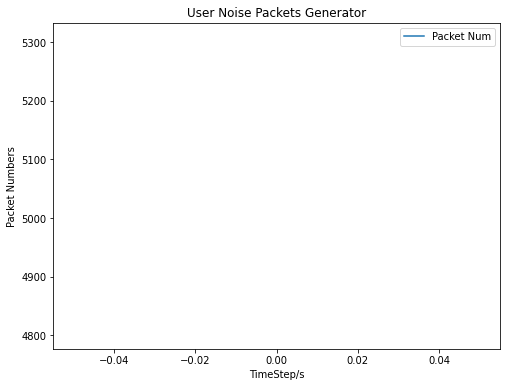

'\nprint("Last 10 waits: "  + ", ".join(["{:.3f}".format(x) for x in ps.waits[-10:]]))\nprint("Last 10 queue sizes: {}".format(pm.sizes[-10:]))\nprint("Last 10 sink arrival times: " + ", ".join(["{:.3f}".format(x) for x in ps.arrivals[-10:]]))\n# print("average wait = {:.3f}".format(sum(ps.waits)/len(ps.waits)))\nprint("received: {}, dropped {}, attack sent {}, User sent {}".format(defender.packets_rec, defender.packets_drop,         pg_attacker.packets_sent, tmp_user_pkt))\nprint("loss rate: {}".format(float(defender.packets_drop)/defender.packets_rec))\n# print("average system occupancy: {:.3f}".format(float(sum(pm.sizes))/len(pm.sizes)))\n'

In [2]:
from gym_cyberwargame.network_sim.attacker import Attacker 
from gym_cyberwargame.network_sim.defender import Defender
from gym_cyberwargame.network_sim.user import User
from gym_cyberwargame.network_sim.SimComponents import PacketGenerator, PacketSink, SwitchPort, PortMonitor
import simpy
import random
import functools
import matplotlib.pyplot as plt


samp_dist = functools.partial(random.expovariate, 1.0)


simpy_env = simpy.Environment()  # Create the SimPy environment
# ps_attack = botnet.attack_from_pg(simpy_env, 'A_1', 2, 0.01)    # Attack action [IP_Src_addr, time_interval]
# simpy_env.run(until=30)
# print(ps_attack.packets_rec, "Bytes in:", ps_attack.bytes_rec)

# ps_attack2 = botnet.attack_from_pg(simpy_env, 'A_12', 2, 0.01) 
# simpy_env.run(until=simpy_env.now+30)
# print(ps_attack2.packets_rec, "Bytes in:", ps_attack2.bytes_rec)

# 1. Attacker 
src_ip_list = ['1', '12', '13', '111','146']
botnet = Attacker(src_ip_list, 1)
print(botnet)
# pg_attacker = botnet.attack_pg(simpy_env, '1', 1, 1,"attacker")

# Build background User
# user_bd = User(['100', '101', '102'], 10, time_interval=5)
user_bd = User(['100', '101', '102', '103', '104'], 1, time_interval=1)
user_pg_list = user_bd.noise_pg(simpy_env)
print(user_bd)
# 3. Defender
defender = Defender(simpy_env, 1000000000000).get_defender()

# Wired to the switch
# pg_attacker.out = defender
for i in user_pg_list:
    # print(i)
    i.out = defender

# Use a PM to see the switch
pm = PortMonitor(simpy_env, defender, samp_dist)

# Use a PS to collect the defender
ps = PacketSink(simpy_env, debug=False, rec_arrivals=True)

defender.out = ps
# simpy_env.run(until=simpy_env.now+1)

user_pkt_gener = []
# print(simpy_env.event)
for i in range(1):
    tmp_user_pkt = 0
    simpy_env.run(until=simpy_env.now+1)
    for i in user_pg_list:
        tmp_user_pkt += i.packets_sent
        i.packets_sent = 0
    # print(tmp_user_pkt)
    user_pkt_gener.append(tmp_user_pkt)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(user_pkt_gener, label='Packet Num')
ax.set_xlabel('TimeStep/s')
ax.set_ylabel('Packet Numbers')
ax.set_title('User Noise Packets Generator')
plt.legend()
plt.show()

"""
print("Last 10 waits: "  + ", ".join(["{:.3f}".format(x) for x in ps.waits[-10:]]))
print("Last 10 queue sizes: {}".format(pm.sizes[-10:]))
print("Last 10 sink arrival times: " + ", ".join(["{:.3f}".format(x) for x in ps.arrivals[-10:]]))
# print("average wait = {:.3f}".format(sum(ps.waits)/len(ps.waits)))
print("received: {}, dropped {}, attack sent {}, User sent {}".format(defender.packets_rec, defender.packets_drop, \
        pg_attacker.packets_sent, tmp_user_pkt))
print("loss rate: {}".format(float(defender.packets_drop)/defender.packets_rec))
# print("average system occupancy: {:.3f}".format(float(sum(pm.sizes))/len(pm.sizes)))
"""
# print((ps.packet_items))    # [ip, bytes, flow]


[4853, 5015, 5092, 5148, 5006, 4963, 4921, 4911, 5055, 5089, 5046, 4982, 5012, 5003, 5065, 4923, 5003, 5035, 4907, 4958, 4934, 4899, 5032, 4900, 5018, 4912, 4944, 5088, 5008, 4967, 5045, 4994, 5156, 5023, 4877, 5164, 5044, 5046, 4984, 4904, 4990, 5003, 4955, 4931, 4989, 5060, 5045, 4944, 4961, 5065, 4971, 4995, 4905, 5036, 5024, 5064, 5047, 5127, 4958, 4983, 4982, 5045, 4920, 4961, 4991, 5021, 4930, 4972, 4954, 5075, 5052, 4983, 5083, 4929, 4923, 5015, 4909, 4989, 5058, 5030, 5070, 5127, 4956, 5017, 5041, 5049, 4961, 5016, 4938, 4971, 5055, 5067, 4993, 4932, 4926, 5064, 4995, 5003, 5000, 5016, 5036, 5030, 4866, 5010, 5003, 5008, 4925, 5009, 5097, 5027, 5025, 4957, 4999, 4871, 5032, 4895, 4973, 5050, 5009, 5000, 4971, 5122, 5063, 4938, 5085, 5073, 4893, 4976, 5008, 5022, 4982, 4969, 5052, 4955, 5017, 4958, 4977, 4942, 5045, 4994, 4917, 5059, 4976, 5015, 5053, 4901, 5026, 4989, 4933, 5016, 4982, 5016, 5092, 5069, 4991, 4989, 4962, 5052, 4899, 4985, 4862, 5028, 5029, 5036, 5035, 5012, 507

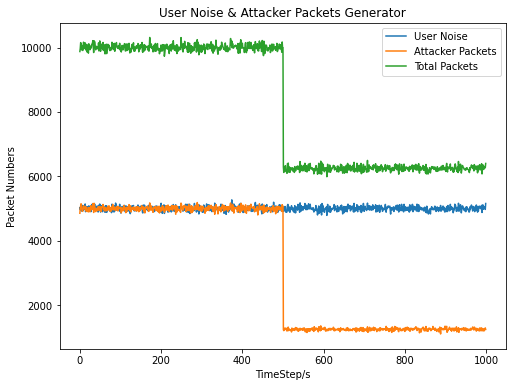

In [3]:
import numpy as np

user_pkt_gener = []
attacker_pkt = []
total = []
# print(simpy_env.event)
for i in range(1000):
    random_idx = np.random.randint(0, 4)
    if i<=500:
        pg_attacker = botnet.attack_pg(simpy_env, src_ip_list[random_idx], 1, 1,"attacker")
        pg_attacker.out = defender
    else:
        pg_attacker = botnet.attack_pg(simpy_env, src_ip_list[random_idx], 4, 1,"attacker")
        pg_attacker.out = defender
    tmp_user_pkt = 0
    simpy_env.run(until=simpy_env.now+1)
    for i in user_pg_list:
        tmp_user_pkt += i.packets_sent
        i.packets_sent = 0
    # print(tmp_user_pkt)
    user_pkt_gener.append(tmp_user_pkt)
    attacker_pkt.append(pg_attacker.packets_sent)
    total.append(tmp_user_pkt+pg_attacker.packets_sent)
print(attacker_pkt)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(user_pkt_gener, label='User Noise')
ax.plot(attacker_pkt, label='Attacker Packets')
ax.plot(total, label='Total Packets')
ax.set_xlabel('TimeStep/s')
ax.set_ylabel('Packet Numbers')
ax.set_title('User Noise & Attacker Packets Generator')
plt.legend()
plt.show()

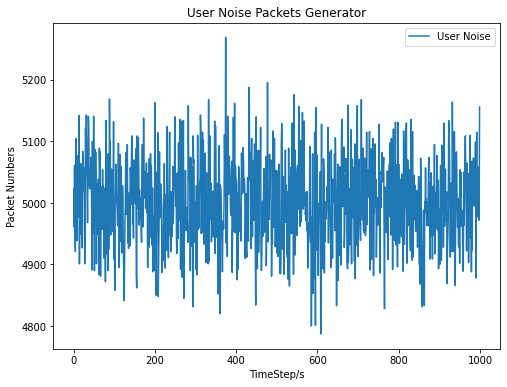

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(user_pkt_gener, label='User Noise')
# ax.plot(attacker_pkt, label='Attacker Packets')
# ax.plot(total, label='Total Packets')
ax.set_xlabel('TimeStep/s')
ax.set_ylabel('Packet Numbers')
ax.set_title('User Noise Packets Generator')
plt.legend()
plt.show()

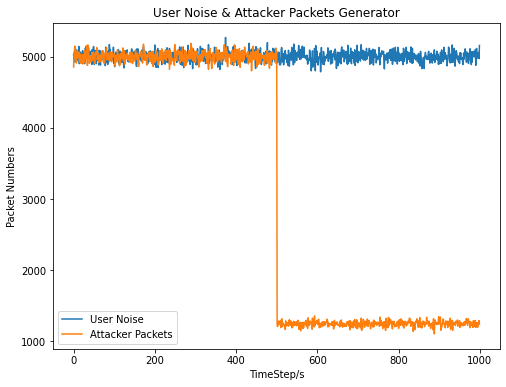

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(user_pkt_gener, label='User Noise')
ax.plot(attacker_pkt, label='Attacker Packets')
# ax.plot(total, label='Total Packets')
ax.set_xlabel('TimeStep/s')
ax.set_ylabel('Packet Numbers')
ax.set_title('User Noise & Attacker Packets Generator')
plt.legend()
plt.show()


# Analysis of Poisson

指数分布的参数 $lambda$，

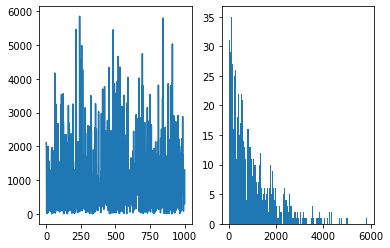

[2110.563642116278, 1968.119890838483, 647.327755257286, 34.65034026124701, 520.2066850803307, 1393.7880874100285, 9.214943647618655, 843.7826017455608, 346.69164417235027, 1247.9662850820694, 1781.4114480131384, 311.97538073181664, 586.8438146979215, 1999.862036162391, 33.78967886657034, 539.1135338075035, 473.50235804214094, 1556.3275611344857, 443.3852082861876, 366.2366293875729, 1556.4388856809278, 525.3135566170856, 330.99471977203336, 246.27337840756255, 582.5267595680239, 1271.5546779060062, 116.92556597479383, 1292.7059771130303, 666.1678417238156, 198.8828929071609, 75.53493883215413, 1099.588399053567, 1028.793901181068, 357.3691071556756, 356.0721052528958, 596.2600734702125, 164.85554721823888, 1181.2714215252945, 1663.891061180991, 1917.0119466953909, 2.200895146016056, 1963.039411002023, 22.31589520597378, 957.666781619745, 594.0301703487435, 399.2762176889993, 648.2638109813124, 168.8276261742829, 549.6997197224065, 61.78780505045636, 1867.6458910841945, 62.367508431744

In [6]:
import random
import matplotlib.pyplot as plt
list_arrive = []

for i in range(1000):
   tmp = random.expovariate(1/1000)
   list_arrive.append(tmp)

fig, ax = plt.subplots(1, 2)
ax[0].plot(list_arrive)
# ax.plot(user_reached, rew)
ax[1].hist(list_arrive, bins=200)
plt.show()
print(list_arrive)